In [47]:
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
from sqlalchemy import func 
import matplotlib.pyplot as plt
from datetime import datetime, date

In [25]:
engine = create_engine('sqlite:///hawaii.sqlite')
conn = engine.connect()

In [26]:
Base = automap_base()
Base.prepare(engine, reflect = True)
Measurements = Base.classes.measurements
Stations = Base.classes.stations

In [27]:
session = Session(engine)

In [28]:
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [24]:
columns = inspector.get_columns('stations')
for c in columns:
    print(c)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [25]:
columns = inspector.get_columns('measurements')
for c in columns:
    print(c)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': INTEGER(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [95]:
precip = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= '2016-08-23').filter(Measurements.date <= '2017-08-22').order_by(Measurements.date).all()

In [96]:
precipitation = pd.DataFrame(precip, columns = ['date', 'prcp'])
precip_final = precipitation.set_index('date')
precip_final.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.00
2016-08-23,0.02


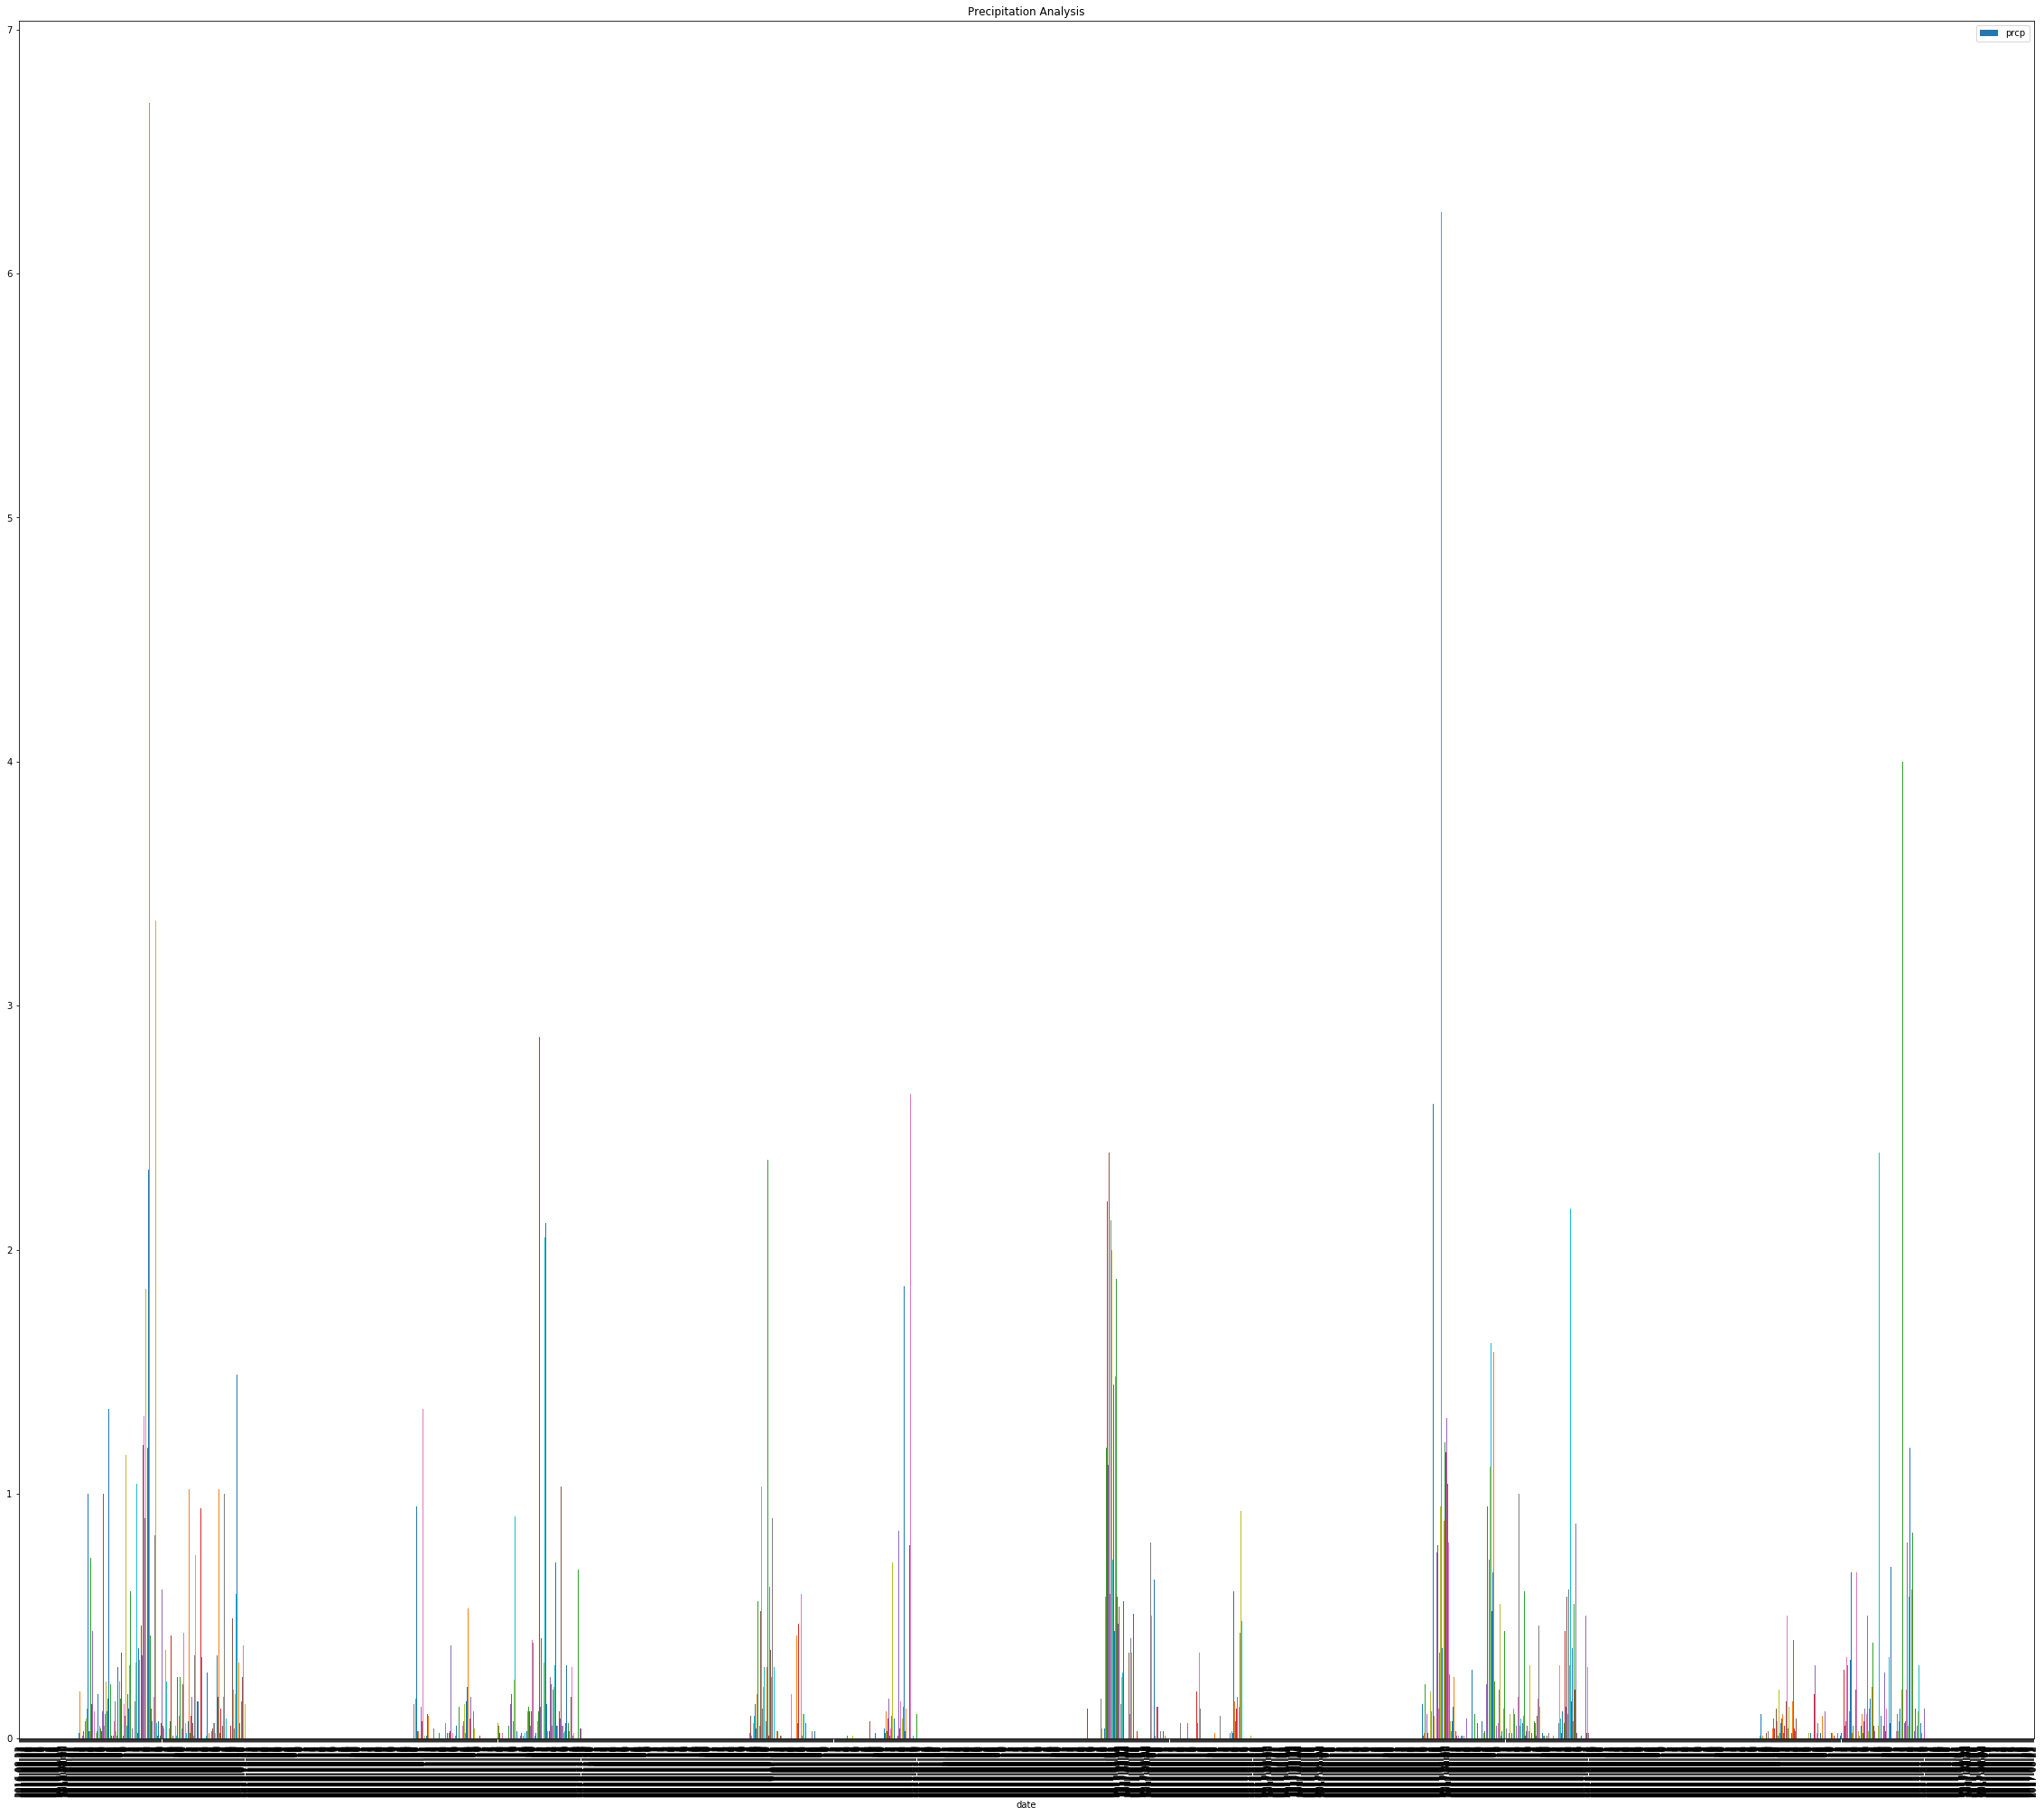

In [111]:
precip_final.plot(y = 'prcp', kind = 'bar', figsize = (40, 35), title = 'Precipitation Analysis')
plt.show()

In [115]:
precip_summary = pd.pivot_table(precip_final, index = 'date', values = 'prcp')
precip_summary.head()

,prcp
date,
2016-08-23,0.387143
2016-08-24,1.332857
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.053333


In [117]:
number_of_stations = session.query(Stations).count()
number_of_stations

9

In [232]:
query = ('SELECT measurements.station, COUNT (*) AS observations FROM measurements GROUP BY measurements.station ORDER BY observations DESC')
observations = pd.DataFrame(conn.execute(query).fetchall())
final_obs = observations.rename(columns = {0: "Station", 1: "Observations"})
final_obs

,Station,Observations
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [235]:
final_obs.max()

Station         USC00519523
Observations           2772
dtype: object

In [81]:
tobs_dates = session.query(Measurements.station, Measurements.date, Measurements.tobs).filter(Measurements.date >= '2016-08-23').filter(Measurements.date <= '2017-08-22').all()
tobs_dates_final = pd.DataFrame(tobs_dates, columns = ['stations', 'date', 'tobs'])

In [88]:
tobs_count = tobs_dates_final['stations'].value_counts()
tobs_count

USC00519397    360
USC00519281    352
USC00516128    348
USC00513117    343
USC00519523    336
USC00514830    304
USC00517948    183
Name: stations, dtype: int64

In [97]:
station_obs = tobs_dates_final.loc[tobs_dates_final['stations'] == 'USC00519397']
station_obs.head()

,stations,date,tobs
0,USC00519397,2016-08-23,81
1,USC00519397,2016-08-24,79
2,USC00519397,2016-08-25,80
3,USC00519397,2016-08-26,79
4,USC00519397,2016-08-27,77


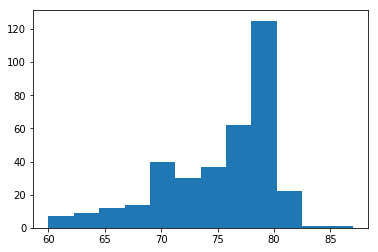

In [105]:
plt.hist(station_obs['tobs'], bins = 12)
plt.show()

In [126]:
def calc_temps(start_date, end_date):
    temps = session.query(func.max(Measurements.tobs), func.min(Measurements.tobs), func.avg(Measurements.tobs)).filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()
    print(pd.DataFrame(temps, columns = ['tmax', 'tmin', 'tavg']))